In [25]:
#Step 1: Data Preparation:
import zipfile
import os


In [26]:
#The location of the zip folder
zip_file_path = 'C:/Users/user/Downloads/netflix_data.zip'

In [32]:
#Unzip the dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    #Extract the zip file to the current working directory
    zip_ref.extractall()

In [33]:
#Rename the unzipped file
unzipped_file_name = 'netflix_data.csv'
renamed_file_name = 'Netflix_shows_movies.csv'

if os.path.exists(renamed_file_name):
    os.remove(renamed_file_name)
    
os.rename(unzipped_file_name, renamed_file_name)

In [35]:
#Step 2: Data Cleaning:
import pandas as pd

# Load the dataset
Netflix_shows_movies = pd.read_csv(renamed_file_name)

# Display the first few rows of the dataset
Netflix_shows_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [40]:
import pandas as pd
import numpy as np

def load_clean_data(file_name):
    #Load the dataset
    netflix_data = pd.read_csv(file_name)
    
    #Check for missing values
    print(netflix_data.isnull().sum())
    
    #Drop rows with missing values
    try:
        netflix_data.dropna(inplace=True)
    except TypeError:
        print("No missing values found in the dataset.")
        
    #Export the cleaned data to a new csv file
    output_dir = 'C:/Users/user/Downloads/'
    output_file_name = 'cleaned_netflix_shows_movies_data.csv'
    output_path = os.path.join(output_dir, output_file_name)
    netflix_data.to_csv(output_path, index=False)
    
    return netflix_data
#Calling the function
file_name = 'Netflix_shows_movies.csv'
netflix_data = load_clean_data(file_name)

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64


In [43]:
#Step 3: Data Exploration
    #Generate descriptive statistics of the data.
    #Perform statistical analysis.
    
# Describe the data
description = netflix_data.describe(include='all')

# Display the descriptive statistics
description

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,3.774000e+03,3774,3774,3774,3774,3774,3774,3774.000000,3774,3774,3774,3774
unique,NaN,2,3752,2920,3667,433,1014,NaN,14,184,296,3766
top,NaN,Movie,The Silence,"Raúl Campos, Jan Suter",Samuel West,United States,"January 1, 2020",NaN,TV-MA,90 min,"Dramas, International Movies",A surly septuagenarian gets another chance at ...
freq,NaN,3678,3,18,10,1323,105,NaN,1189,93,237,3
mean,7.510908e+07,NaN,NaN,NaN,NaN,NaN,NaN,2012.087440,NaN,NaN,NaN,NaN
std,1.341114e+07,NaN,NaN,NaN,NaN,NaN,NaN,9.566944,NaN,NaN,NaN,NaN
min,2.477470e+05,NaN,NaN,NaN,NaN,NaN,NaN,1942.000000,NaN,NaN,NaN,NaN
25%,7.027581e+07,NaN,NaN,NaN,NaN,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN
50%,8.014732e+07,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,NaN
75%,8.024067e+07,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN


Matplotlib is building the font cache; this may take a moment.


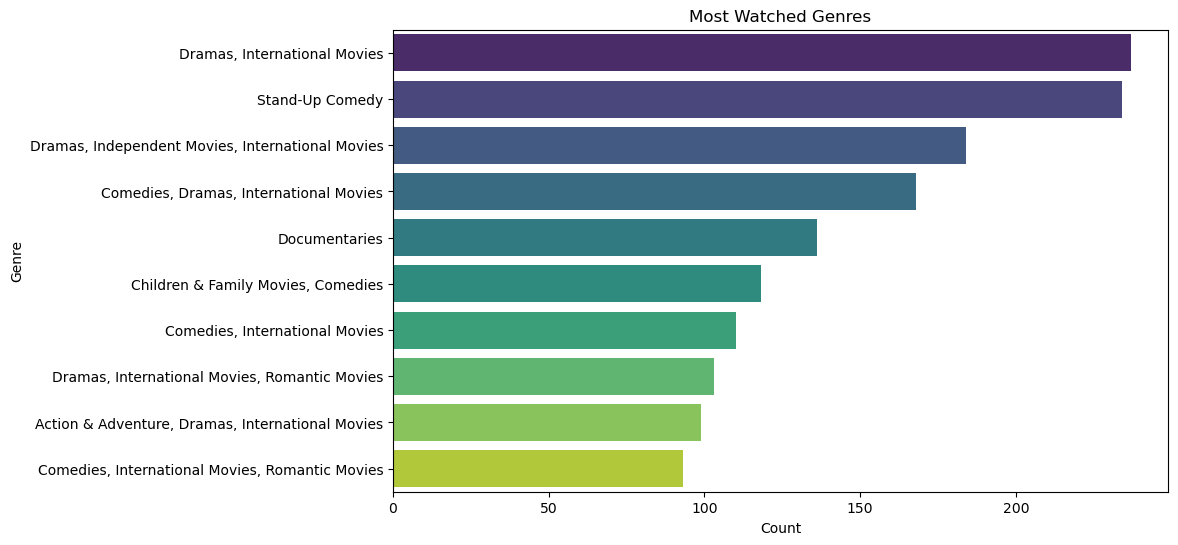

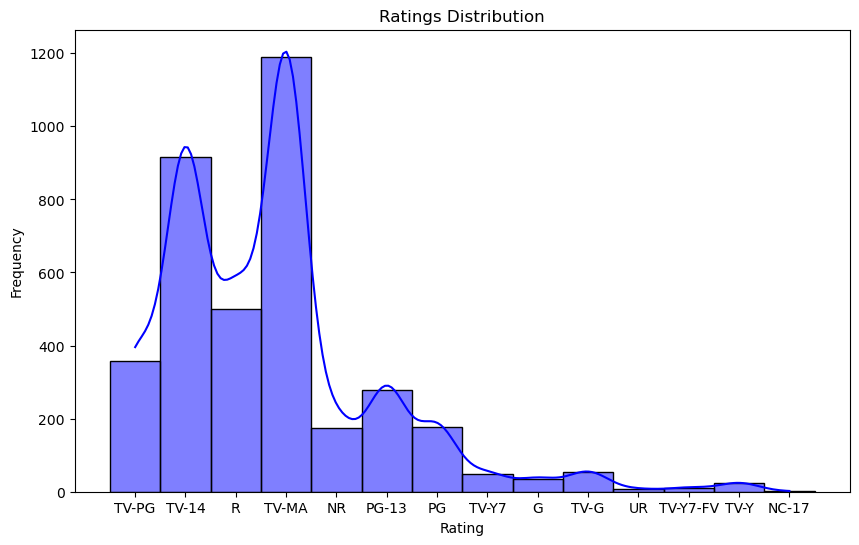

In [46]:
#Step 4: Data Visualization
#Create visualizations using Seaborn, Pyplot, and Matplotlib.
    #Most watched genres.
    #Ratings distribution.

import seaborn as sns
import matplotlib.pyplot as plt

# Visualization 1: Most watched genres
plt.figure(figsize=(10, 6))
genre_count = netflix_data['listed_in'].value_counts().head(10)
sns.barplot(x=genre_count.values, y=genre_count.index, hue=genre_count.index, palette='viridis', dodge=False, legend=False)
plt.title('Most Watched Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


# Visualization 2: Ratings distribution
plt.figure(figsize=(10, 6))
sns.histplot(netflix_data['rating'], bins=20, kde=True, color='blue')
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()